<a href="https://colab.research.google.com/github/HVBLEGENDZZ9/BASICS-OF-DEEP-LEARNING/blob/main/Neural_Network_multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###**GETTING THE DATASET**

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names[y_train[0]],x_train.shape

('Ankle boot', (60000, 28, 28))

###**BUILDING A FUNCTION FOR RANDOM IMAGE GENERATION**

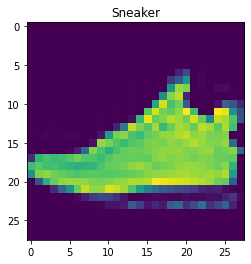

In [40]:
def random_img_from_data(x,y,class_names):
  import random
  i = random.randint(0,60000)
  plt.imshow(x[i])
  plt.title(class_names[y[i]])
random_img_from_data(x_train,y_train,class_names)

###**NORMALIZING OUR DATA**

In [5]:
x_train_norm = x_train/x_train.max()
x_test_norm = x_test/x_test.max()
x_train_norm.max(),x_test_norm.max()

(1.0, 1.0)

###**BUILDING OUR MULTI-CLASSIFYING NEURAL NETWORK**

In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation = 'relu'),
  tf.keras.layers.Dense(100,activation = 'relu'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics = "accuracy")

###**TRAINING THE MODEL WITH NON-NORMALIZED DATA**

In [9]:
history1 = model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4652 - accuracy: 0.7445 - val_loss: 0.7875 - val_accuracy: 0.7413
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5400 - accuracy: 0.8139 - val_loss: 0.5257 - val_accuracy: 0.8165
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4677 - accuracy: 0.8318 - val_loss: 0.4835 - val_accuracy: 0.8328
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4384 - accuracy: 0.8412 - val_loss: 0.4600 - val_accuracy: 0.8385
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4091 - accuracy: 0.8513 - val_loss: 0.4201 - val_accuracy: 0.8532
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3924 - accuracy: 0.8575 - val_loss: 0.4226 - val_accuracy: 0.8483
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8639 - val_loss: 0.4111 - val_accuracy:

###**EVALUATING THE MODEL**

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.8575


[0.42117324471473694, 0.8575000166893005]

In [11]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

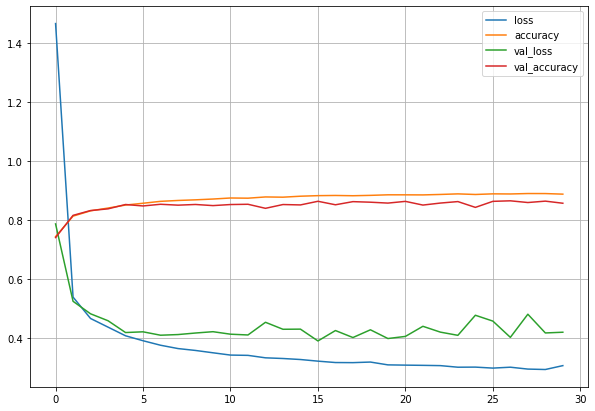

In [12]:
pd.DataFrame(history1.history).plot(figsize=(10,7))
plt.grid(True)

In [13]:
y_pred = model.predict(x_test)
y_pred

array([[8.2377219e-26, 3.3427768e-22, 1.2608066e-26, ..., 7.9866135e-03,
        3.7232202e-09, 9.9136961e-01],
       [8.9753903e-06, 1.5093232e-07, 9.2541516e-01, ..., 0.0000000e+00,
        2.3997350e-06, 0.0000000e+00],
       [2.4026013e-16, 1.0000000e+00, 1.9820258e-24, ..., 0.0000000e+00,
        3.2694189e-15, 0.0000000e+00],
       ...,
       [1.8788716e-17, 5.4985618e-23, 5.2241470e-19, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.7843732e-15, 1.0000000e+00, 5.1032923e-24, ..., 0.0000000e+00,
        1.2850283e-10, 0.0000000e+00],
       [1.0200022e-32, 0.0000000e+00, 0.0000000e+00, ..., 2.6686846e-09,
        1.7777937e-18, 3.2814663e-36]], dtype=float32)

##**PLOTTING THE CONFUSION MATRIX**

In [14]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred.argmax(axis=1))

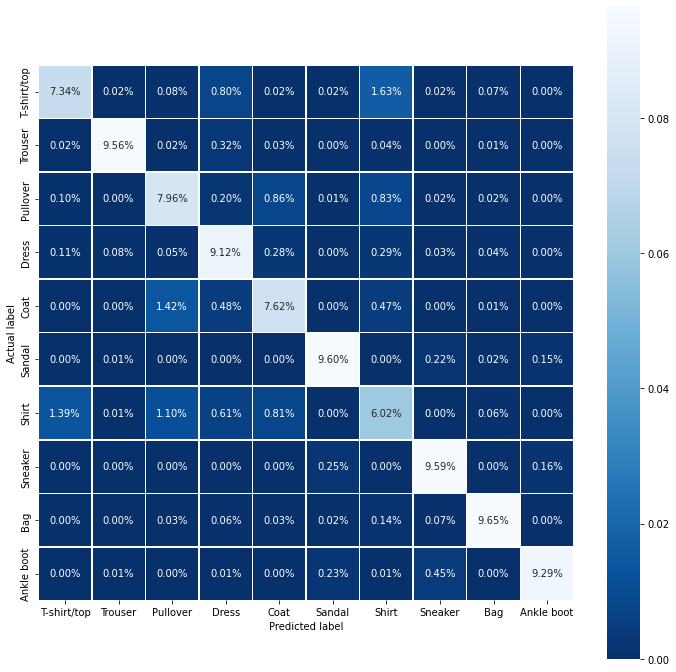

In [15]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues_r',xticklabels=class_names,yticklabels=class_names);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [16]:
'''
from the above confusion matrix, we can see that our model is incorrectly classifying:
-coats as tshirt/top
-coat as pullover
-etc
'''

'\nfrom the above confusion matrix, we can see that our model is incorrectly classifying:\n-coats as tshirt/top\n-coat as pullover\n-etc\n'

###**TRAINING ON NORMALIZED DATA**

In [23]:
model2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation = 'relu'),
  tf.keras.layers.Dense(100,activation = 'relu'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(),metrics = "accuracy")
history2 = model2.fit(x_train_norm,y_train,epochs=30,validation_data=(x_test_norm,y_test))

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4908 - accuracy: 0.8227 - val_loss: 0.4409 - val_accuracy: 0.8372
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3676 - accuracy: 0.8646 - val_loss: 0.3804 - val_accuracy: 0.8623
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3335 - accuracy: 0.8770 - val_loss: 0.3855 - val_accuracy: 0.8606
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3098 - accuracy: 0.8848 - val_loss: 0.3604 - val_accuracy: 0.8701
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2948 - accuracy: 0.8908 - val_loss: 0.3718 - val_accuracy: 0.8675
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.8947 - val_loss: 0.3472 - val_accuracy: 0.8781
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2682 - accuracy: 0.8997 - val_loss: 0.3701 - val_accuracy:

###**DOING THE SAME EVALUATIONS ON OUR NEW MODEL**

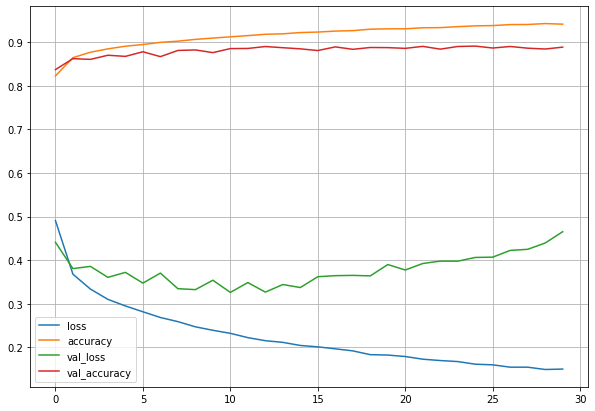

In [24]:
pd.DataFrame(history2.history).plot(figsize=(10,7))
plt.grid(True)

In [25]:
model2.evaluate(x_train_norm,y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1453 - accuracy: 0.9439


[0.14530940353870392, 0.9438999891281128]

Text(87.0, 0.5, 'TRUE LABEL')

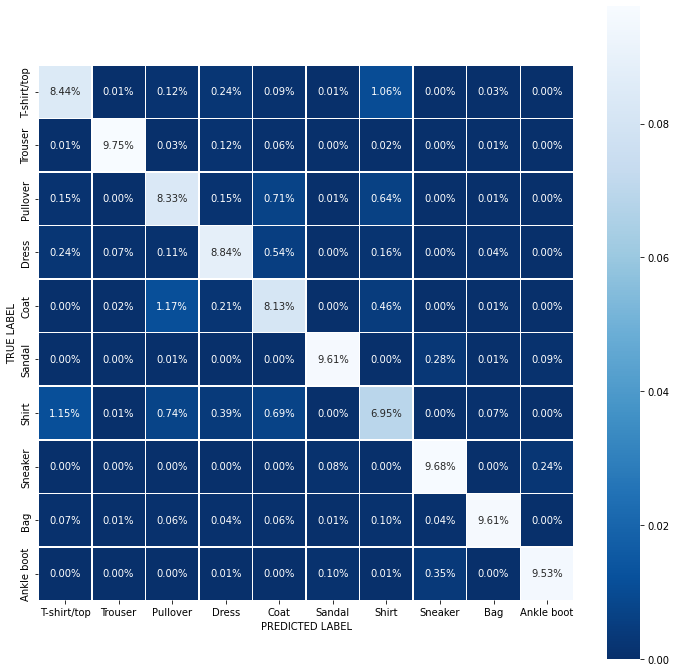

In [36]:
y_pred = model2.predict(x_test_norm)
plt.figure(figsize=(12,12))
cm = confusion_matrix(y_test,y_pred.argmax(axis=1))
sns.heatmap(cm/np.sum(cm),annot = True,fmt = '.2%',cbar=True,linewidths=0.5,square=True,cmap = 'Blues_r',xticklabels=class_names,yticklabels=class_names)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")